# Тема “Обучение без учителя”
## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston = load_boston()
data = boston["data"]
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [150]:
X = pd.DataFrame(data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["price"])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [154]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = pd.DataFrame(tsne.fit_transform(X_train_scaled), columns=['Feature_1', 'Feature_2'])
X_train_tsne

,Feature_1,Feature_2
0,28.138090,18.375324
1,-9.785578,-4.535539
2,-15.695753,-17.543627
3,37.924854,13.517046
4,-8.786393,3.995167
...,...,...
399,-7.871442,4.985711
400,-13.531818,-4.034057
401,-17.871710,-23.890985
402,37.071964,11.377393


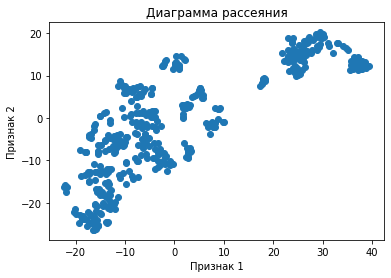

In [155]:
plt.scatter(X_train_tsne.iloc[:, 0], X_train_tsne.iloc[:, 1])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Диаграмма рассеяния')    
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [156]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [157]:
train_labels = model.fit_predict(X_train_scaled)
X_labels_scaled = pd.merge(X_train_tsne, pd.DataFrame(train_labels, columns=["Claster"]), left_index=True, right_index=True)
X_labels_scaled.head()

,Feature_1,Feature_2,Claster
0,28.138090,18.375324,1
1,-9.785578,-4.535539,0
2,-15.695753,-17.543627,2
3,37.924854,13.517046,1
4,-8.786393,3.995167,0


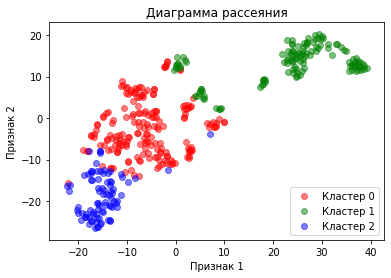

In [161]:
plt.scatter(X_labels_scaled[X_labels_scaled['Claster'] == 0].iloc[:, 0], 
            X_labels_scaled[X_labels_scaled['Claster'] == 0].iloc[:, 1], c='r', alpha=0.5, label="Кластер 0")
plt.scatter(X_labels_scaled[X_labels_scaled['Claster'] == 1].iloc[:, 0], 
            X_labels_scaled[X_labels_scaled['Claster'] == 1].iloc[:, 1], c='g', alpha=0.5, label="Кластер 1")
plt.scatter(X_labels_scaled[X_labels_scaled['Claster'] == 2].iloc[:, 0], 
            X_labels_scaled[X_labels_scaled['Claster'] == 2].iloc[:, 1], c='b', alpha=0.5, label="Кластер 2")

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Диаграмма рассеяния')
#plt.colorbar(aspect=1, shrink=1)
plt.legend(loc='lower right')
plt.show()

In [159]:
mean_crim = [
    X_train.loc[list(X_labels_scaled['Claster'] == 0), "CRIM"].mean(),
    X_train.loc[list(X_labels_scaled['Claster'] == 1), "CRIM"].mean(),
    X_train.loc[list(X_labels_scaled['Claster'] == 2), "CRIM"].mean()
]
print(mean_crim)
mean_price = [
    y_train.loc[list(X_labels_scaled['Claster'] == 0), "price"].mean(),
    y_train.loc[list(X_labels_scaled['Claster'] == 1), "price"].mean(),
    y_train.loc[list(X_labels_scaled['Claster'] == 2), "price"].mean()
]
print(mean_price)

[0.42166020942408367, 10.797028425196853, 0.07356558139534886]
[24.958115183246072, 16.165354330708666, 27.788372093023252]


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [160]:
test_labels = model.predict(X_test_scaled)
mean_crim_test = [
    X_test.loc[test_labels == 0, "CRIM"].mean(),
    X_test.loc[test_labels == 1, "CRIM"].mean(),
    X_test.loc[test_labels == 2, "CRIM"].mean()
]
print(mean_crim_test)
mean_price_test = [
    y_test.loc[test_labels == 0, "price"].mean(),
    y_test.loc[test_labels == 1, "price"].mean(),
    y_test.loc[test_labels == 2, "price"].mean()
]
print(mean_price_test)

[0.26607882352941176, 10.165531142857143, 0.062060000000000004]
[21.860784313725492, 16.437142857142856, 31.35]


### Вывод
Близость полученных средних значений для кластеров на тестовой выборке подтверждает корректность построенной модели